# Importing essential libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

# Dwonload dataset and Explore the Data

In [3]:
new_dataset = pd.read_csv ('online_fraud.csv')

In [4]:
new_dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [5]:
new_dataset.shape

(1048575, 11)

In [6]:
new_dataset['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

# Check information 

In [7]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [8]:
new_dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


# Analyzing data: Creating different plots to check relationships between different variables 

In [7]:
len(new_dataset)

1048575

In [8]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:xlabel='type', ylabel='count'>

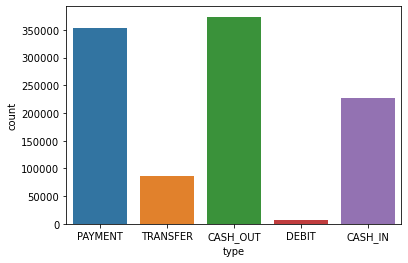

In [9]:
# 'countplot' : how many transactions has happend amongs the transactions type
# x axis = type
#y axis = count
sns.countplot(data = new_dataset, x = 'type')

<AxesSubplot:xlabel='type', ylabel='amount'>

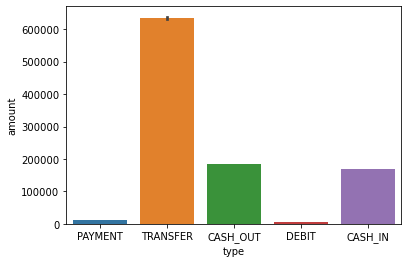

In [10]:
sns.barplot( data = new_dataset, x = 'type', y = 'amount')

<AxesSubplot:xlabel='step', ylabel='amount'>

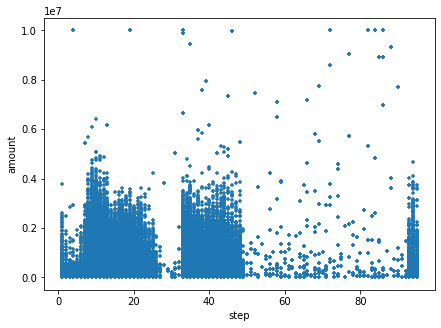

In [11]:
#correlation scatter plot
new_dataset.plot.scatter (x = 'step', y = 'amount', marker = '+', figsize = (7, 5))

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

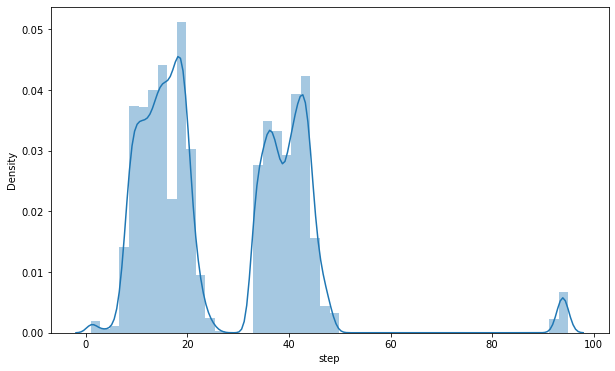

In [12]:
#Distribution of the step column using distplot
plt.figure(figsize=(10, 6))
sns.distplot(new_dataset['step'], bins=50)

##### The above graph shows the maximum distribution among 0 to 60 step.

<AxesSubplot:>

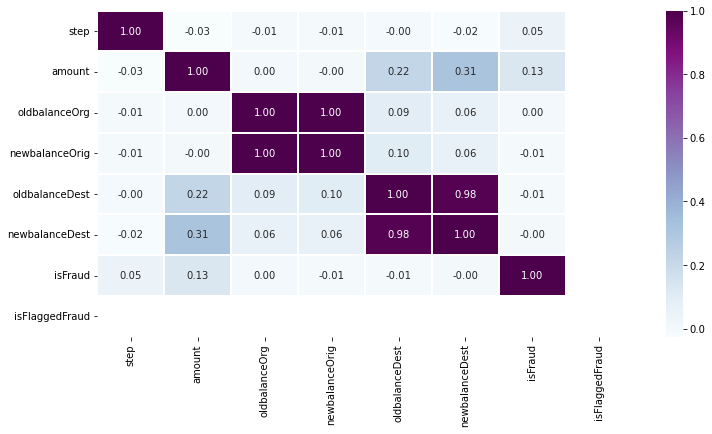

In [13]:
# Correlation among different features using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(new_dataset.corr(), cmap='BuPu', fmt='.2f', linewidths=2, annot=True)

# Data Wrangling or data cleansing

In [14]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Checking null values 

In [15]:
new_dataset.isnull().head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [16]:
new_dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### There is no null value in the dataset 

<AxesSubplot:>

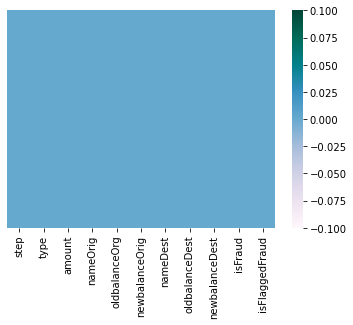

In [17]:
#check the null value thorugh heatmap
sns.heatmap(new_dataset.isnull(), yticklabels = False, cmap = 'PuBuGn')

#### The heatmap is showing that there is no null value in the dataset.

In [18]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Dropping irrelevant columns

In [19]:
new_dataset.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud' ], axis = 1, inplace = True)

In [20]:
new_dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
1048570,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0


# One-Hot encoding

In [21]:
#type is the only categorical data in the dataset.
#let's encode it into numerical data through one-hot enconding
new_dataset['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [22]:
pd.get_dummies(new_dataset['type']).head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [23]:
new_type = pd.get_dummies(new_dataset['type'],drop_first=False)

In [24]:
new_type

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1048570,0,1,0,0,0
1048571,0,0,0,1,0
1048572,0,0,0,1,0
1048573,0,0,0,1,0


# Concatenate the updated column with the new_dataset dataset

In [25]:
new_dataset = pd.concat([new_dataset, new_type], axis=1)

In [26]:
new_dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0


In [27]:
new_dataset.drop(['type'], axis=1, inplace=True)

In [28]:
new_dataset.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


# Train and Test the Data
- y = dependent variables = isFraud
- x = Independent Variables = All except isFraud

In [29]:
x = new_dataset.drop ('isFraud', axis = 1)
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [30]:
y = new_dataset['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

<AxesSubplot:>

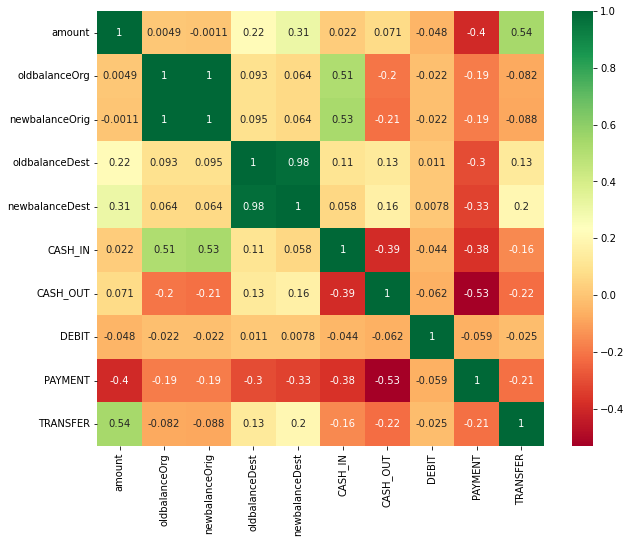

In [31]:
plt.subplots(figsize=(10,8))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

In [32]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [33]:
y.tail()

1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, dtype: int64

# Balancing the dataset

In [34]:
from imblearn import over_sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
from collections import Counter 

In [37]:
ros = RandomOverSampler (random_state = 0)
x,y = ros.fit_resample(x, y)
print (sorted(Counter(y).items()))

[(0, 1047433), (1, 1047433)]


In [38]:
y.shape
x.shape

(2094866, 10)

# Splitting the dataset into test and train datasets

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [40]:
x_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1987984,337974.21,337974.21,0.00,0.00,0.00,0,0,0,0,1
927193,151182.18,20555.00,0.00,0.00,151182.18,0,1,0,0,0
1525551,10000000.00,14800000.00,4830219.15,0.00,0.00,0,0,0,0,1
659725,1366.37,0.00,0.00,0.00,0.00,0,0,0,1,0
513010,178338.28,896276.33,1074614.60,626538.62,448200.34,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
491263,140745.33,0.00,0.00,1880641.65,2021386.98,0,1,0,0,0
1840200,121626.82,121626.82,0.00,653744.34,775371.16,0,1,0,0,0
470924,17262.78,11879.00,0.00,0.00,0.00,0,0,0,1,0
491755,273913.55,30175.00,0.00,0.00,273913.55,0,1,0,0,0


In [41]:
x_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1411429,6215.44,6215.44,0.00,0.00,0.00,0,0,0,0,1
1141458,3606943.31,3606943.31,0.00,0.00,0.00,0,0,0,0,1
1742898,192765.49,192765.49,0.00,0.00,0.00,0,0,0,0,1
1950600,9039246.82,9039246.82,0.00,464686.69,9503933.51,0,1,0,0,0
1133141,3156421.43,3156421.43,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1001352,5461.67,15958.00,10496.33,0.00,0.00,0,0,0,1,0
1526629,27951.26,27951.26,0.00,10439.00,698752.71,0,1,0,0,0
713078,304529.59,0.00,0.00,3621818.43,3926348.02,0,1,0,0,0
568149,12900.50,58612.00,45711.50,0.00,0.00,0,0,0,1,0


In [42]:
y_train

1987984    1
927193     0
1525551    1
659725     0
513010     0
          ..
491263     0
1840200    1
470924     0
491755     0
128037     0
Name: isFraud, Length: 1675892, dtype: int64

In [43]:
y_test

1411429    1
1141458    1
1742898    1
1950600    1
1133141    1
          ..
1001352    0
1526629    1
713078     0
568149     0
1810502    1
Name: isFraud, Length: 418974, dtype: int64

# Logistic Regression algorithm

In [44]:
LR = LogisticRegression()

In [45]:
LR

LogisticRegression()

In [46]:
LR.fit(x_train, y_train)

LogisticRegression()

# Prediction 

In [47]:
prediction = LR.predict (x_test)

In [48]:
prediction

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

# Test Accuracy

In [49]:
from sklearn.metrics import classification_report 

In [50]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94    209113
           1       0.92      0.97      0.94    209861

    accuracy                           0.94    418974
   macro avg       0.94      0.94      0.94    418974
weighted avg       0.94      0.94      0.94    418974



# Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, prediction)

array([[190899,  18214],
       [  7343, 202518]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9390009881281416

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


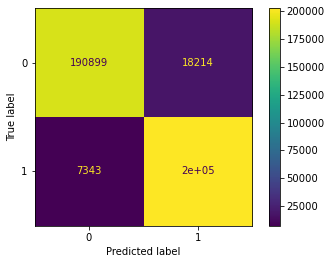

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, x_test, y_test)
plt.show()

# Plot the ROC Curve

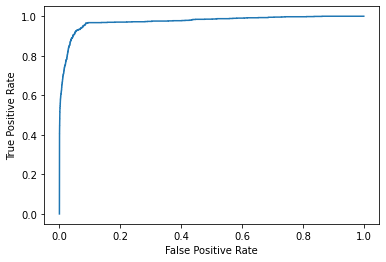

In [54]:

from sklearn import metrics
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calculate the AUC

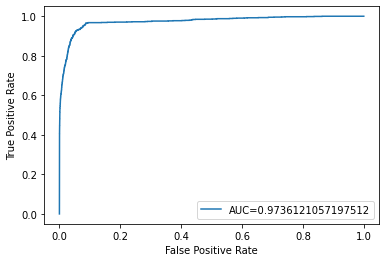

In [55]:
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### The AUC for this logistic regression model turns out to be 0.9736. This indicates that the model does a great job at identifying the data since it is very near to 10.

# Hyperparameter Tuning : GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}

#LR=LogisticRegression

LR_cv=GridSearchCV(LR,grid,cv=10)
LR_cv.fit(x_train,y_train)

print("\nTuned hpyerparameters : best parameters - ",LR_cv.best_params_)
print("\nAccuracy :",LR_cv.best_score_)


Tuned hpyerparameters : best parameters -  {'C': 0.001, 'penalty': 'l2'}

Accuracy : 0.9389161117491265


In [57]:
LR=LogisticRegression(C=1,penalty="l2")
LR.fit(x_train,y_train)
print("score",LR.score(x_test,y_test))

score 0.9390009881281416


# Conclusion 
- We can see from the aforementioned charts and models that logistic regression works well. The logistic regression model can be adjusted further to improve performance. The ability of the programme to identify the characteristics that separate fraudulent from legitimate transactions from such a large amount of data is truly impressive.